
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---
## Trabajo práctico entregable - Parte 1

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [ ]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [ ]:
df[:5]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN
3,Hombre,39,Argentina,Corrientes,15.0,15.0,13.0,5,Posgrado,Incompleto,...,En mi trabajo actual,Heterosexual,NaN,NaN,501-1000,Otras industrias,7,6,"Abono de celular, Capacitaciones y/o cursos, C...",NaN
4,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,Universitario,En curso,...,Jamás,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,6,6,"Clases de idiomas, Horarios flexibles, Vacacio...",NaN


# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

In [ ]:
df.columns

Index(['profile_gender', 'profile_age', 'work_country', 'work_province',
       'profile_years_experience', 'work_years_in_company',
       'work_years_in_current_position', 'work_people_in_charge_of',
       'profile_studies_level', 'profile_studies_level_state',
       'profile_career', 'profile_university',
       'profile_specialization_courses', 'profile_open_source_contributions',
       'profile_programming_as_hobby', 'work_role', 'tools_platform',
       'tools_programming_languages', 'tools_frameworks', 'tools_data_bases',
       'tools_qa_testing', 'tools_IDEs', 'tools_work_pc_os',
       'tools_cellphone_os', 'work_on_call_duty', 'salary_on_call_duty_charge',
       'work_on_call_duty_charge_type', 'work_contract_type',
       'salary_monthly_BRUTO', 'salary_monthly_NETO', 'salary_in_usd',
       'salary_satisfaction', 'salary_comparison_last_semester',
       'salary_has_bonus', 'salary_bonus_tied_to',
       'salary_inflation_adjustment_2020',
       'salary_percentage_inf

Responder a la pregunta: ¿Cuáles son los lenguajes de programación asociados a los mejores salarios?

Para ello:

1. Seleccionar las columnas relevantes para analizar.





In [ ]:
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO']

2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de Valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
-Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
-Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.

In [ ]:
df['tools_programming_languages'].describe() #descripcion de la columna categorica

count                          6094
unique                         1637
top       Ninguno de los anteriores
freq                            661
Name: tools_programming_languages, dtype: object

In [ ]:
df['salary_monthly_NETO'].describe().apply(lambda s: '{0:.2f}'.format(s)) #descripcion de la columna numérica, limitando decimales

count       5883.00
mean       94907.95
std        96862.26
min            1.00
25%        51480.00
50%        78000.00
75%       106000.00
max      2080000.00
Name: salary_monthly_NETO, dtype: object

In [ ]:
(df['tools_programming_languages']).isnull().any() # existen valores nulos en la columna

True

In [ ]:
(df['salary_monthly_NETO']).isnull().any() # existen valores nulos en la columna

True

### Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



In [ ]:
df.tools_programming_languages[:3]

0                     Ninguno
1    HTML, Javascript, Python
2                     Ninguno
Name: tools_programming_languages, dtype: object

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [ ]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages')

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:5]

<ipython-input-11-ffde73747336>:25: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  .apply(pd.Series).stack()\


,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
0,ninguno,Ninguno,43000.0,[ninguno]
1,html,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
2,ninguno,Ninguno,127000.0,[ninguno]


In [ ]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:10]

,language,frequency
0,javascript,2513
1,sql,2154
2,html,1861
3,python,1475
4,java,1453
5,css,1247
6,bash/shell,993
7,php,891
8,.net,823
9,typescript,779


En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

## Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

In [ ]:
##FILTRADO DE LOS 10 LENGUAJES MAS IMPORTANTES y DE VALORES NULOS
#FLTRADO DE LENGUAJE

interesting_languages = language_count.loc[:10,'language']
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]

#FILTRADO DE VALORES NULOS
filtered_df_lang=filtered_df_lang.dropna(subset=['programming_language', 'salary_monthly_NETO'])
filtered_df_lang

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
1,html,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."
3,css,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."
...,...,...,...,...
6093,java,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,"[c, c++, html, java, javascript, php, python, ..."
6093,javascript,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,"[c, c++, html, java, javascript, php, python, ..."
6093,php,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,"[c, c++, html, java, javascript, php, python, ..."
6093,python,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,"[c, c++, html, java, javascript, php, python, ..."


In [ ]:
#Filtramos el df con el 5 % de los salarios mas altos
_df = filtered_df_lang[filtered_df_lang['salary_monthly_NETO'] > filtered_df_lang['salary_monthly_NETO'].quantile(0.95)]

<Axes: ylabel='Count'>

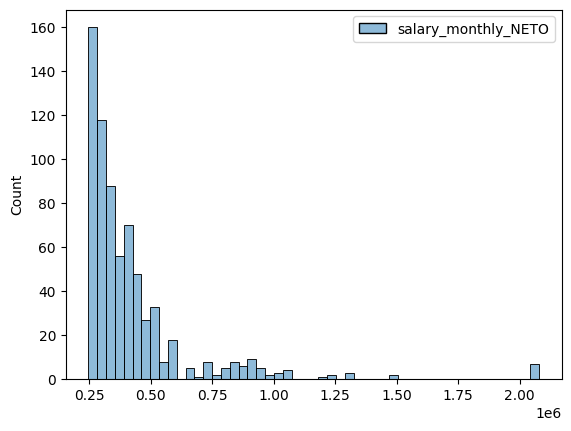

In [ ]:
sns.histplot(_df)#histogrma de los salarios netos filtrados

<Axes: >

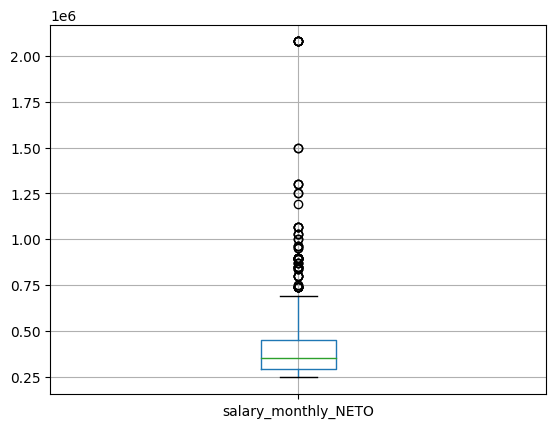

In [ ]:
_df.boxplot("salary_monthly_NETO", grid=True) #diagrama de boxplot de los salarios filtrados

In [ ]:
_df['salary_monthly_NETO'].describe().apply(lambda s: '{0:.2f}'.format(s))

count        699.00
mean      425270.35
std       254180.53
min       246000.00
25%       290000.00
50%       350000.00
75%       450000.00
max      2080000.00
Name: salary_monthly_NETO, dtype: object

In [ ]:
Q1=290000
Q2=350000
Q3=450000

Corte_sup = Q3+(1.5*(Q3-Q1))
Corte_sup = Corte_sup*2 #multiplicamos por un factor 2 porque viendo el histograma y el boxplot consideramos que son datos que nos interesará dejar para el análisis.
Corte_sup


1380000.0

**Analizando el diagrama de caja y bigotes se considera el 5% de los salarios mas altos y consideramos un limite superior para eliminar valores atipicos del Corte_sup = 2*(Q3+(1.5*(Q3-Q1)))**

In [ ]:
_df = _df[_df['salary_monthly_NETO'] < Corte_sup] #se trunca los salarios maximos

In [ ]:
_df['salary_monthly_NETO'].describe().apply(lambda s: '{0:.2f}'.format(s)) #verificamos que el corte superior de valores atipicos se produjo exitosamente

count        690.00
mean      405368.08
std       184075.36
min       246000.00
25%       290000.00
50%       350000.00
75%       450000.00
max      1300000.00
Name: salary_monthly_NETO, dtype: object

**Dado a que consideramos los 10 lenguajes mas frecuentes de de la programación para esta base de datos, cambiaremos la pregunta de :**

**¿Cuáles son los lenguajes de programación asociados a los mejores salarios? a ¿Cuáles de los lenguajes de programación más utilizado por los usuarios se encuentran asociados a los mejores salarios?**

In [ ]:
(_df['salary_monthly_NETO']).isnull().any() # comprobamos que se filtraron las columnas correspondientes

False

In [ ]:
(_df['programming_language']).isnull().any() # comprobamos que se filtraron las columnas correspondientes

False

3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

**¿Cuáles de los lenguajes de programación más utilizado por los usuarios se encuentran asociados a los mejores salarios?**

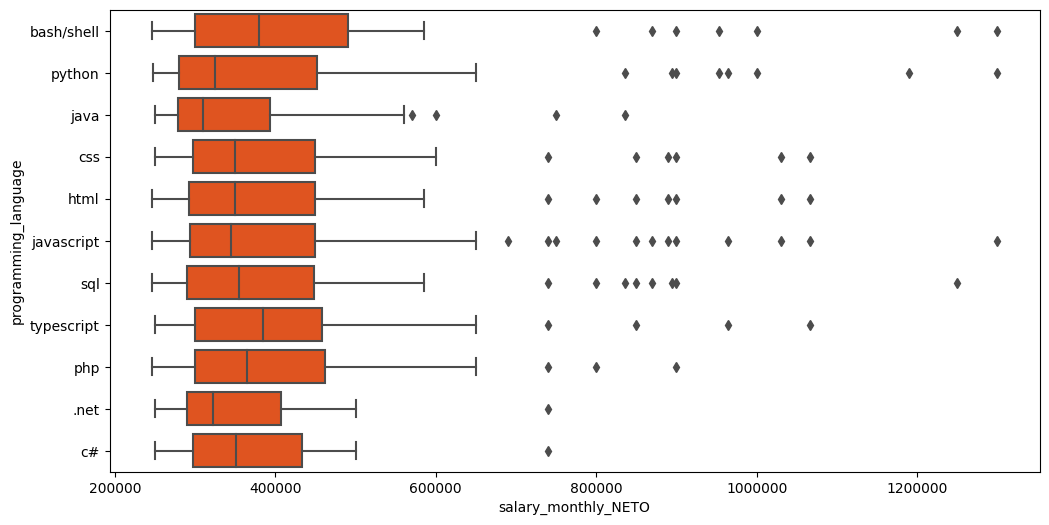

In [ ]:
#comparación de la distribución de los salarios netos con respecto a los lenguajes utilizados.
plt.figure(figsize=(12, 6))
sns.boxplot(data=_df, x='salary_monthly_NETO', y='programming_language',
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
#Se calculan las medias de los salarios de cada lenguaje de programación y se ordenan de mayor a menor
mean = round(_df.groupby('programming_language')['salary_monthly_NETO'].mean(),2)
mean = pd.DataFrame(mean)
mean.sort_values(by=['salary_monthly_NETO'], inplace=True, ascending=False)
mean

,salary_monthly_NETO
programming_language,
bash/shell,452918.61
typescript,424890.53
css,422899.92
python,412377.18
php,410977.55
sql,407589.05
javascript,405319.11
html,400063.98
c#,369890.09


Text(0.5, 1.0, 'Salary distribution for java')

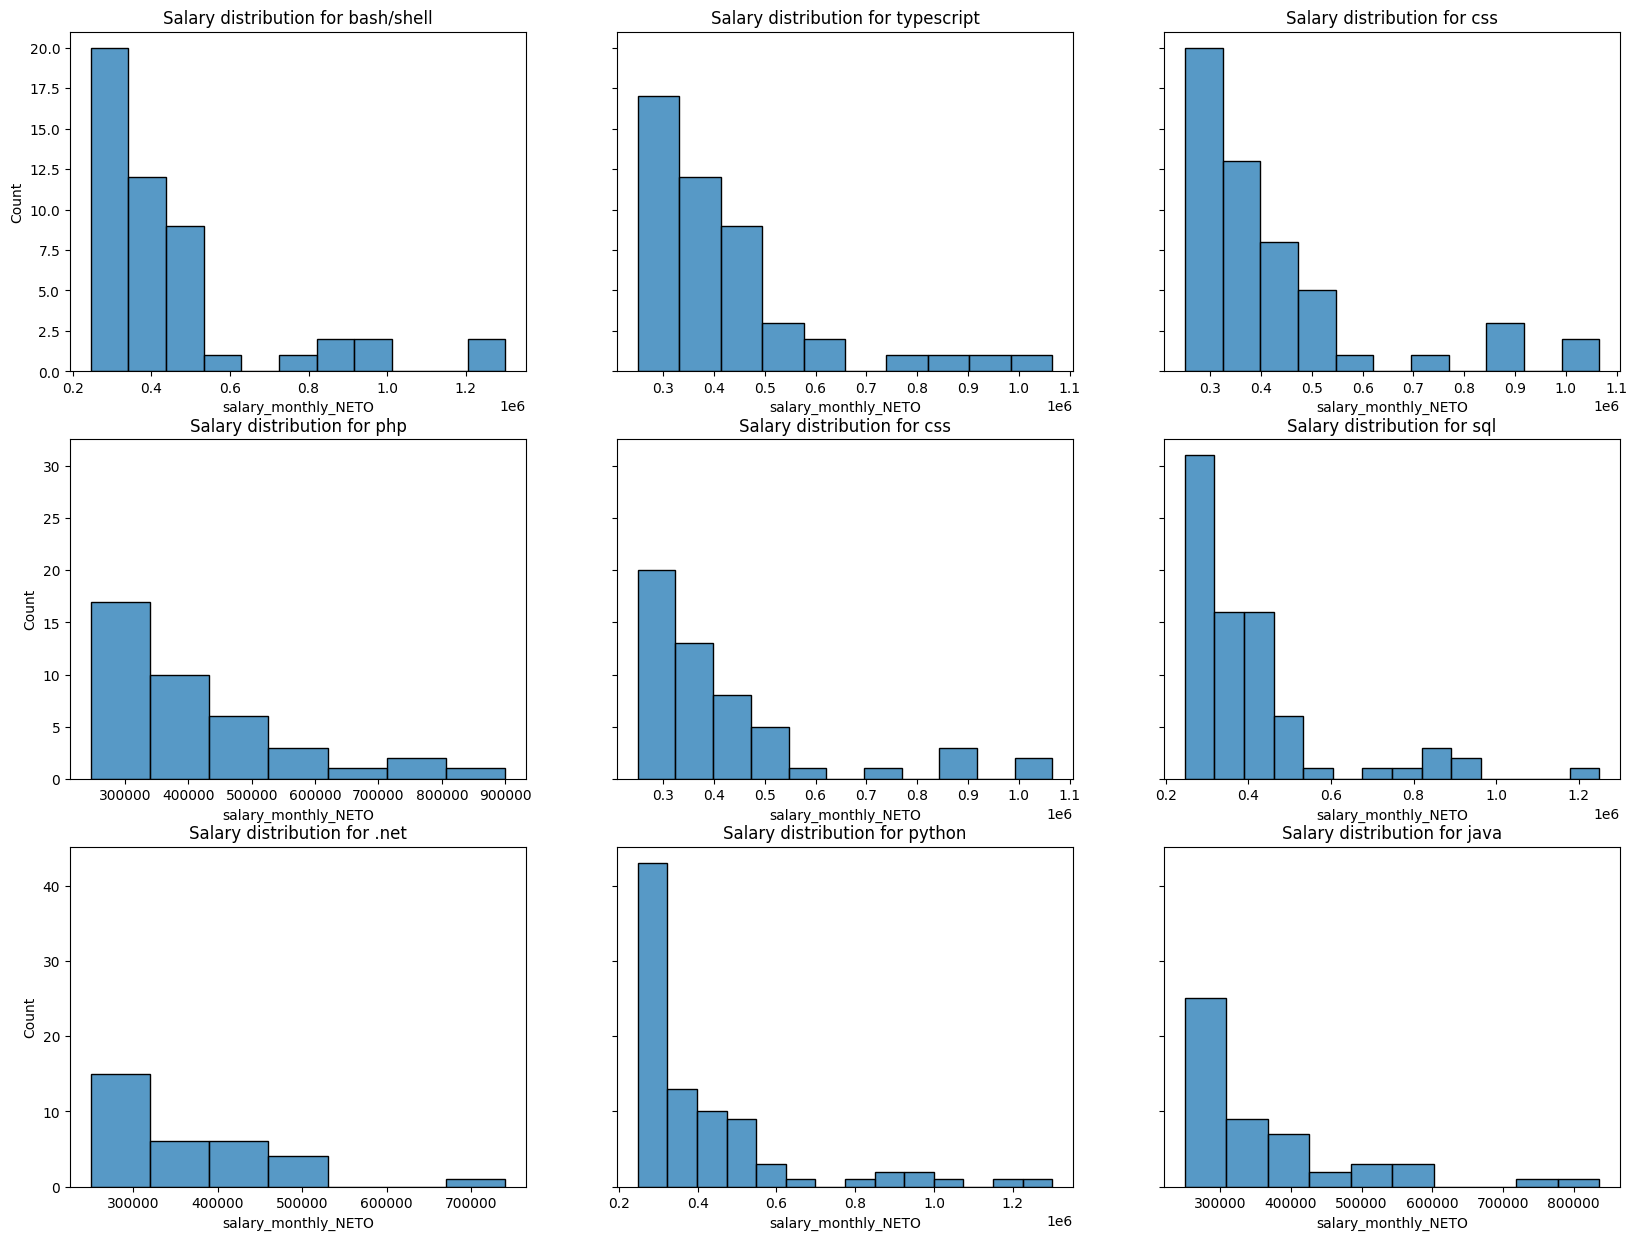

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20,15), sharey='row')

df_python= _df[_df['programming_language']=='bash/shell']
sns.histplot(df_python['salary_monthly_NETO'],ax=ax[0,0])
ax[0,0].set_title('Salary distribution for bash/shell')

df_python= _df[_df['programming_language']=='typescript']
sns.histplot(df_python['salary_monthly_NETO'],ax=ax[0,1])
ax[0,1].set_title('Salary distribution for typescript')

df_python= _df[_df['programming_language']=='css']
sns.histplot(df_python['salary_monthly_NETO'],ax=ax[0,2])
ax[0,2].set_title('Salary distribution for css')

df_python= _df[_df['programming_language']=='php']
sns.histplot(df_python['salary_monthly_NETO'],ax=ax[1,0])
ax[1,0].set_title('Salary distribution for php')

df_python= _df[_df['programming_language']=='css']
sns.histplot(df_python['salary_monthly_NETO'],ax=ax[1,1])
ax[1,1].set_title('Salary distribution for css')

df_python= _df[_df['programming_language']=='sql']
sns.histplot(df_python['salary_monthly_NETO'],ax=ax[1,2])
ax[1,2].set_title('Salary distribution for sql')

df_python= _df[_df['programming_language']=='.net']
sns.histplot(df_python['salary_monthly_NETO'],ax=ax[2,0])
ax[2,0].set_title('Salary distribution for .net')

df_python= _df[_df['programming_language']=='python']
sns.histplot(df_python['salary_monthly_NETO'],ax=ax[2,1])
ax[2,1].set_title('Salary distribution for python')

df_python= _df[_df['programming_language']=='java']
sns.histplot(df_python['salary_monthly_NETO'],ax=ax[2,2])
ax[2,2].set_title('Salary distribution for java')

**Para poder responder a la pregunta planteada utilizamos: en primera instancia un diagrama de cajas y bigotes para tener una idea general del comportamiento de los datos, luego decidimos emplear estadistica descriptiva utilizando la media aritmetica para poder identificar cuáles son aquellos lenguajes que están asociados a los mejores sueldos. Y por último efectuamos una visualización de los histogramas de cada uno de los lenguajes por separado que nos ayudó a identificar que todos comparten una distribución similiar sesgados hacia la derecha.**

**En conclusión, podemos decir que los lenguajes de progrmación que cobran los mejores sueldos son aquellos en los que la media es más alta ya que la mayoria comparten una distribución similar, sesgados hacia la derecha.**









*Para el armado del ejercicio 3 de **Comunicación y Visualización** agregaremos
los siguientes cálculos:*


In [ ]:
#Queremos saber qué porcentaje de mi muestra sabe o conoce más de un lenguaje de programación. Para ello:
# Convertir todos los valores a cadenas
_df['languages_list'] = _df['tools_programming_languages'].apply(str).str.split(',')

# Contar cuántas filas contienen más de un lenguaje
num_multiple_languages = sum(_df['languages_list'].apply(len) > 1)

#Calcular el %
Porc_1= num_multiple_languages / _df['tools_programming_languages'].count()
Porc_1

0.9608695652173913

In [ ]:
#Queremos saber qué porcentaje de mi muestra sabe o conoce Bash/Shell que es el que obtuvo la media más alta
num_bash_shell = _df['tools_programming_languages'].apply(lambda x: 'Bash/Shell' in x).sum()
num_bash_shell

Porc_2= num_bash_shell / _df['tools_programming_languages'].count()
Porc_2

0.25507246376811593

In [ ]:
#Ahora combinamos las dos anteriores y vemos qué porcentaje sabe o conoce Bash/Shell y además, más de un lenguaje:
num_multiple_languages_with_bash = sum(_df['languages_list'].apply(lambda x: len(x) > 1 and 'Bash/Shell' in x))
num_multiple_languages_with_bash

Porc_3=num_multiple_languages_with_bash / _df['tools_programming_languages'].count()
Porc_3

0.2217391304347826

# Ejercicio 2 - Densidades y varias variables

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones.

Creamos un nuevo df (df_nuevo) con las columnas relevantes que queremos analizar:

In [ ]:
df_nuevo = df.loc[:,('profile_gender', 'profile_age', 'work_country', 'work_province',
       'profile_years_experience','tools_programming_languages', 'salary_monthly_NETO','salary_monthly_BRUTO','profile_studies_level')]

In [ ]:
df_nuevo

,profile_gender,profile_age,work_country,work_province,profile_years_experience,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,profile_studies_level
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,Ninguno,43000.000,53000.0,Universitario
1,Hombre,29,Argentina,Corrientes,5.0,"HTML, Javascript, Python",63000.000,79000.0,Universitario
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,Ninguno,127000.000,160000.0,Secundario
3,Hombre,39,Argentina,Corrientes,15.0,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.000,130000.0,Posgrado
4,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,9.0,"CSS, HTML, Javascript, SQL, TypeScript",106000.000,140000.0,Universitario
...,...,...,...,...,...,...,...,...,...
6090,Hombre,37,Argentina,Ciudad Autónoma de Buenos Aires,13.0,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.000,99000.0,Terciario
6091,Hombre,38,Argentina,Ciudad Autónoma de Buenos Aires,12.0,Ninguno de los anteriores,71000.000,85000.0,Universitario
6092,Hombre,24,Argentina,Ciudad Autónoma de Buenos Aires,2.0,Ninguno de los anteriores,45.753,47250.0,Terciario
6093,Hombre,28,Argentina,La Pampa,5.0,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.000,86000.0,Terciario


In [ ]:
#elimino valores nulos de la columnas de interes
df_nuevo = df_nuevo.dropna(subset=['profile_years_experience','salary_monthly_NETO','profile_studies_level','profile_age','profile_gender'])
df_nuevo

,profile_gender,profile_age,work_country,work_province,profile_years_experience,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,profile_studies_level
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,Ninguno,43000.000,53000.0,Universitario
1,Hombre,29,Argentina,Corrientes,5.0,"HTML, Javascript, Python",63000.000,79000.0,Universitario
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,Ninguno,127000.000,160000.0,Secundario
3,Hombre,39,Argentina,Corrientes,15.0,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.000,130000.0,Posgrado
4,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,9.0,"CSS, HTML, Javascript, SQL, TypeScript",106000.000,140000.0,Universitario
...,...,...,...,...,...,...,...,...,...
6090,Hombre,37,Argentina,Ciudad Autónoma de Buenos Aires,13.0,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.000,99000.0,Terciario
6091,Hombre,38,Argentina,Ciudad Autónoma de Buenos Aires,12.0,Ninguno de los anteriores,71000.000,85000.0,Universitario
6092,Hombre,24,Argentina,Ciudad Autónoma de Buenos Aires,2.0,Ninguno de los anteriores,45.753,47250.0,Terciario
6093,Hombre,28,Argentina,La Pampa,5.0,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.000,86000.0,Terciario


## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos?

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




Para realizar este ejercicio seleccionamos: **salary_monthly_NETO**, **profile_years_experience** y **profile_age** como vatriables númericas y **profile_gender** y **profile_studies_level** como variables categóricas.

Lo primero que vamos a analizar es el comportamiento entre las variables: **salary_monthly_NETO vs profile_years_experience vs profile_gender**


In [ ]:
#revisamos los datos de estadistica descriptiva de la variables del salario neto
df_nuevo['salary_monthly_NETO'].describe().apply(lambda s: '{0:.2f}'.format(s))


count       5883.00
mean       94907.95
std        96862.26
min            1.00
25%        51480.00
50%        78000.00
75%       106000.00
max      2080000.00
Name: salary_monthly_NETO, dtype: object

In [ ]:
#calculamos el corte superior del nuevo df
q1=51433.25
q2=77900
q3=106000

corte_sup = q3+(1.5*(q3-q1))
corte_sup

187850.125

In [ ]:
#revisamos los valores que tiene profile_gender
df_nuevo.profile_gender.unique()

array(['Mujer', 'Hombre', 'Otros'], dtype=object)

In [ ]:
df_nuevo.profile_gender

0        Mujer
1       Hombre
2        Mujer
3       Hombre
4       Hombre
         ...  
6090    Hombre
6091    Hombre
6092    Hombre
6093    Hombre
6094    Hombre
Name: profile_gender, Length: 5883, dtype: object

Visualización entre: **salary_monthly_NETO vs profile_years_experience vs profile_gender**

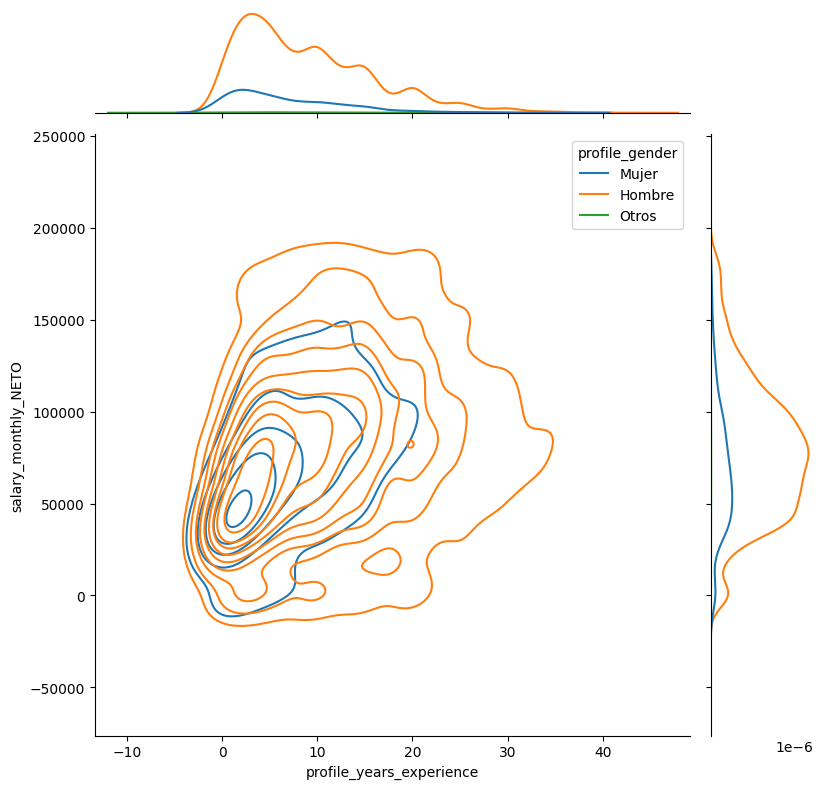

In [ ]:
 #limito los años de experiencia considerando que una persona puede tener cómo máximo 47 años de experiencia (que es la resta entre 65 y 18 años ya que se considera la población economicamente activa)
df_nuevo = df_nuevo[df_nuevo.profile_years_experience  < 65]

#realizo la comparación a través de la siguiente visualización
sns.jointplot(data=df_nuevo[df_nuevo.salary_monthly_NETO < corte_sup], x='profile_years_experience',
                  y='salary_monthly_NETO', hue=df.profile_gender,
                  kind='kde', height=8)

**Conclusión**

El gráfico representa un gráfico de dispersión conjunta y densidades entre el salario mensual neto y los años de experiencia laboral de una muestra . Cada punto representa una persona encuestada, y se utiliza el color para distinguir las distintas categorías de género: Hombre, Mujer, y Otros.

En el eje horizontal (x) se muestra el número de años de experiencia laboral, mientras que en el eje vertical (y) se muestra el salario mensual neto. La densidad suavizada se utiliza para mostrar la distribución conjunta de estas dos variables.

Podemos observar que la densidad de la distribución conjunta muestra una clara separación en tres grupos de personas en términos de salario: un grupo con bajos salarios, otro grupo con salarios moderados, y un grupo con altos salarios. También se puede observar que hay una relación positiva entre el salario mensual neto y los años de experiencia laboral: a medida que aumenta la experiencia laboral, el salario tiende a ser mayor.

Además, podemos notar que las distribuciones para cada categoría de género se superponen, lo que sugiere que no hay diferencias significativas en la distribución conjunta de salario y experiencia laboral entre las distintas categorías de género. Sin embargo, podemos ver que el grupo de Otros tiene una mayor densidad suavizada en los salarios más bajos, lo que sugiere que hay una proporción mayor de personas de esta categoría con bajos salarios en comparación con las otras categorías de género.

 Ahora vamos a analizar el comportamiento entre **salary_monthly_NETO vs profile_age**

<Figure size 800x400 with 0 Axes>

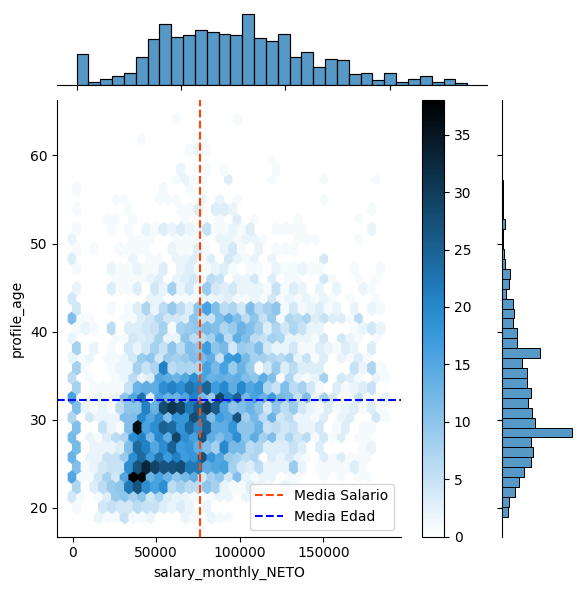

In [ ]:
#limitamos el profile age a la población economicamente activa (desde 18 a 65 años)
df_nuevo = df_nuevo[df_nuevo['profile_age'] < 65]
df_nuevo = df_nuevo[df_nuevo['profile_age'] > 18]

fig = plt.figure(figsize=(8,4))
sns.jointplot(data=df_nuevo[df_nuevo.salary_monthly_NETO < corte_sup], x='salary_monthly_NETO',
                  y='profile_age', kind='hex', height=6)
plt.axvline(df_nuevo[df_nuevo.salary_monthly_NETO < corte_sup]['salary_monthly_NETO'].mean(), color='orangered',
            linestyle='--', label='Media Salario')
plt.axhline(df_nuevo[df_nuevo.salary_monthly_NETO < corte_sup]['profile_age'].mean(), color='blue',
            linestyle='--', label='Media Edad')
plt.legend()
plt.colorbar()
# Remove scietific notation
plt.ticklabel_format(style='plain', axis='y')

**Conclusión**

Este gráfico representa  la relación entre el salario mensual neto y la edad.  En el eje x tenemos el salario mensual neto, mientras que en el eje y la edad. La distribución hexagonal muestra cómo se agrupan los puntos de datos en el gráfico. Las áreas más densas de puntos se representan con hexágonos de mayor intensidad de color. También se incluye una barra de color en el gráfico, que proporciona una escala de colores para interpretar la distribución hexagonal.

Podemos observar que la mayor concentración de datos se encuentra por debajo de las lineas punteados que indican la media de cada variable, lo que nos hace suponer que la mayoría de los sueldos más bajos se concentran entre el grupo de personas que tienen entre 22 y 32 años de edad aproximadamente.

Por último, analizamos el comportamiento de dos variables categóricas: **profile_gender vs profile_studies_level**

In [ ]:
#Vemos los valores que tiene profile_studies_level
df_nuevo.profile_studies_level.unique()

array(['Universitario', 'Secundario', 'Posgrado', 'Terciario',
       'Doctorado', 'Posdoctorado', 'Primario'], dtype=object)

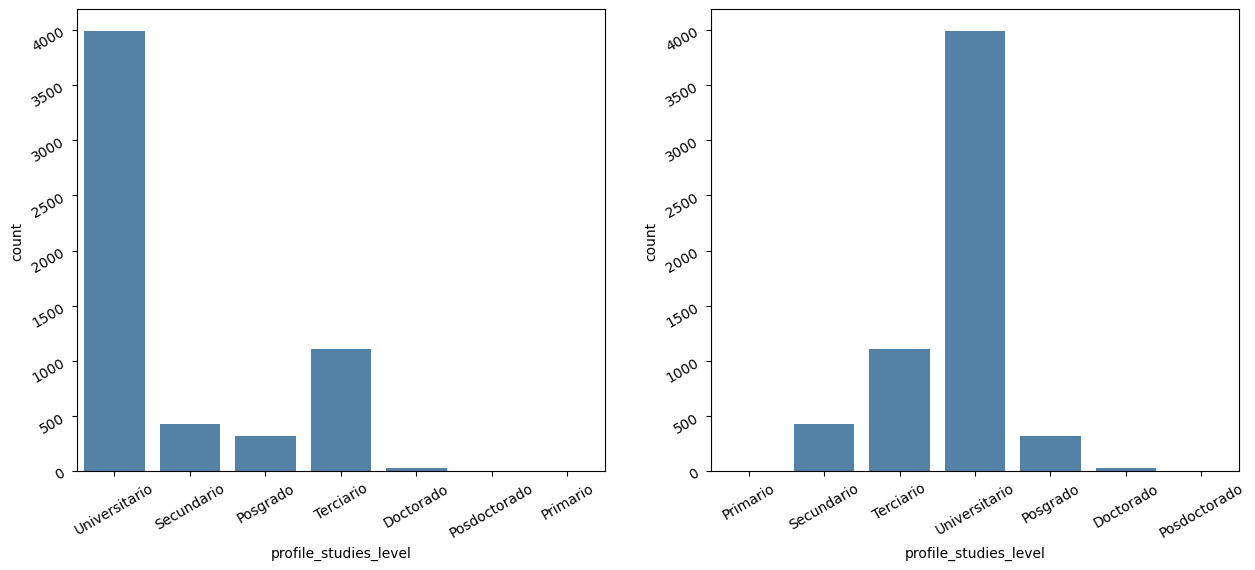

In [ ]:
#ordenamos los datos de menor especialización a mayor especialización de estudios y graficamos
sorted_studies_levels = ['Primario','Secundario', 'Terciario', 'Universitario',
                         'Posgrado', 'Doctorado', 'Posdoctorado']
fig, axes = plt.subplots(ncols=2, figsize=(15,6)) #se genera la figura, se divide en dos lugares y se define su tamaño
g = sns.countplot(x= df_nuevo.profile_studies_level.dropna(), color='steelblue', ax=axes[0]) #gráfico de conteos (en el lugar 0)
g = sns.countplot(x= df_nuevo.profile_studies_level.dropna(), color='steelblue', ax=axes[1], #gráfico de conteos ordenado (en el lugar 1)
                  order=sorted_studies_levels)
for ax in axes:
  ax.tick_params(labelrotation=30) # en cada lugar (ax in axes) se rota la etiqueta

In [ ]:
# Tabla de contingencia normalizada
pd.crosstab(df_nuevo.profile_gender, df_nuevo.profile_studies_level, normalize=True)[sorted_studies_levels]

profile_studies_level,Primario,Secundario,Terciario,Universitario,Posgrado,Doctorado,Posdoctorado
profile_gender,,,,,,,
Hombre,0.00034,0.069265,0.160654,0.565351,0.040844,0.003063,0.000681
Mujer,0.00000,0.004084,0.026378,0.109939,0.012764,0.001361,0.000000
Otros,0.00000,0.000170,0.001191,0.003233,0.000170,0.000511,0.000000


**Conclusión**

Esas lineas de código generan una tabla de contingencia  normalizada relacionando el género y los niveles de estudios, donde los valores se presentan como proporciones o probabilidades.

Este tipo de tablas nos permiten estimar probabilidades, por ejemplo: viendo la tabla podemos decir que: si sos hombre y tenes estudios universitario tenes un 56% de probabilidades de trabajar como programador, pero en el caso de las mujeres esa probabilidad baja a un 11%.

## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



(array([-200000.,       0.,  200000.,  400000.,  600000.,  800000.,
        1000000.]),
 [Text(-200000.0, 0, '−200000'),
  Text(0.0, 0, '0'),
  Text(200000.0, 0, '200000'),
  Text(400000.0, 0, '400000'),
  Text(600000.0, 0, '600000'),
  Text(800000.0, 0, '800000'),
  Text(1000000.0, 0, '1000000')])

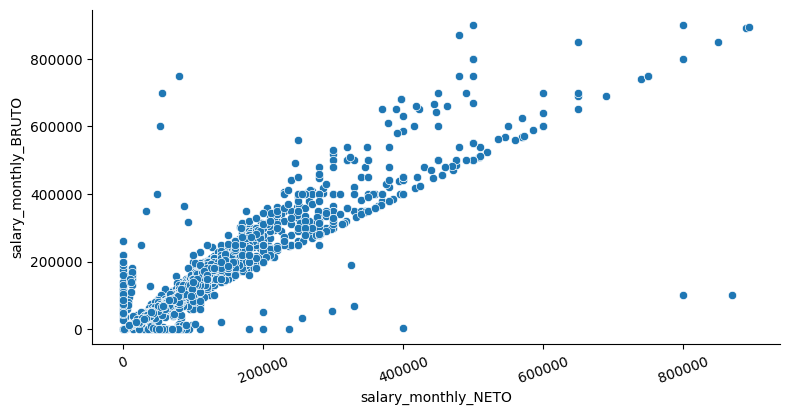

In [ ]:
import numpy as np
df_limpio=df_nuevo[(df_nuevo.salary_monthly_BRUTO <950000)& (df_nuevo.salary_monthly_NETO <950000)]
sns.pairplot(data=df_limpio, y_vars=['salary_monthly_BRUTO'],
                 x_vars=['salary_monthly_NETO'],
                 aspect=2, height=4)
plt.xticks(rotation=20)

In [ ]:
correlation = df_limpio['salary_monthly_BRUTO'].corr(df['salary_monthly_NETO'])
x = df_limpio['salary_monthly_BRUTO'].values
y = df_limpio['salary_monthly_NETO'].values

correlation = round(np.corrcoef(x, y)[0, 1],2)
correlation

0.92

Para determinar si existe una correlación entre el salario bruto y el salario neto, podemos utilizar un análisis de correlación.

En este caso, podemos utilizar la función corr de pandas para calcular el coeficiente de correlación.

Otra forma de visualizar la relación entre ambas variables es utilizando un scatterplot. Si las dos variables están altamente correlacionadas, los puntos deberían formar una línea recta con una pendiente positiva. Si no hay correlación, los puntos estarán dispersos sin un patrón claro.

El scatterplot muestra una tendencia lineal positiva, lo que sugiere que hay una correlación positiva entre el salario bruto y el salario neto. La correlación calculada es 0.92, lo que indica una correlación muy fuerte entre las variables.Tambien se observan valores anomalos, y puede deberse a que los empleados no contestaron correctamente la pregunta, ya  los valores deberian concentrarse por arriba de la diagonal considerando que el Bruto > Neto.

Por lo tanto, podemos concluir que existe una alta correlación entre el salario bruto y el salario neto en la muestra de datos proporcionada. Si el objetivo es simplificar la encuesta, podría ser razonable eliminar una de las variables si no se considera crítica para los propósitos de la encuesta.

## c) Densidad condicional

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






In [ ]:
#Analizamos cuáles son los valores que contiene la columna del nivel de estudio
Nivel_Estudio = df_nuevo['profile_studies_level'].unique()
Nivel_Estudio

array(['Universitario', 'Secundario', 'Posgrado', 'Terciario',
       'Doctorado', 'Posdoctorado', 'Primario'], dtype=object)

In [ ]:
#Agrupamos la población en dos subpoblaciones, por un lado Básico-Intermedio y por otro Avanzado.
df_nuevo.loc[:,'profile_studies_level']= df_nuevo['profile_studies_level'].replace({'Universitario':'Avanzado', 'Secundario':'Básico-Intermedio','Posgrado':'Avanzado',
                                                  'Terciario':'Básico-Intermedio', 'Doctorado':'Avanzado', 'Posdoctorado':'Avanzado', 'Primario':'Básico-Intermedio' })

# Mostrar los valores únicos de la columna "Nivel de estudio"
print(df_nuevo.loc[:,'profile_studies_level'].dropna().unique())


['Avanzado' 'Básico-Intermedio']


In [ ]:
#Limitaciones de los salarios segun valores atipicos
Q1=290000
Q2=350000
Q3=450000

Corte_inf = Q1-(1.5*(Q3-Q1))
Corte_inf = Corte_inf/2
Corte_inf


25000.0

In [ ]:
df_sinatipicos = df_nuevo[(df_nuevo['salary_monthly_NETO'] < Corte_sup)&(df_nuevo['salary_monthly_NETO'] > Corte_inf)] #se trunca los salarios maximos y minimos

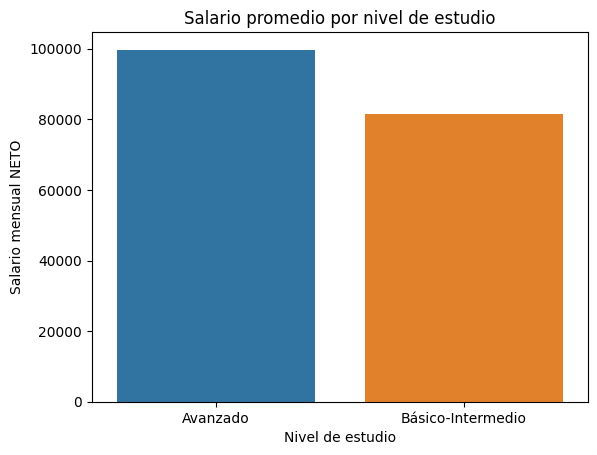

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupamos los datos por nivel de estudio y calculamos la media del salario
data = df_nuevo.groupby('profile_studies_level')['salary_monthly_NETO'].mean().reset_index()

# Filtramos por los dos niveles de estudio que nos interesan
data = data.loc[data['profile_studies_level'].isin(['Básico-Intermedio', 'Avanzado'])]

# Graficamos los datos
sns.barplot(x='profile_studies_level', y='salary_monthly_NETO', data=data)

# Agregamos etiquetas
plt.title('Salario promedio por nivel de estudio')
plt.xlabel('Nivel de estudio')
plt.ylabel('Salario mensual NETO')
plt.show()

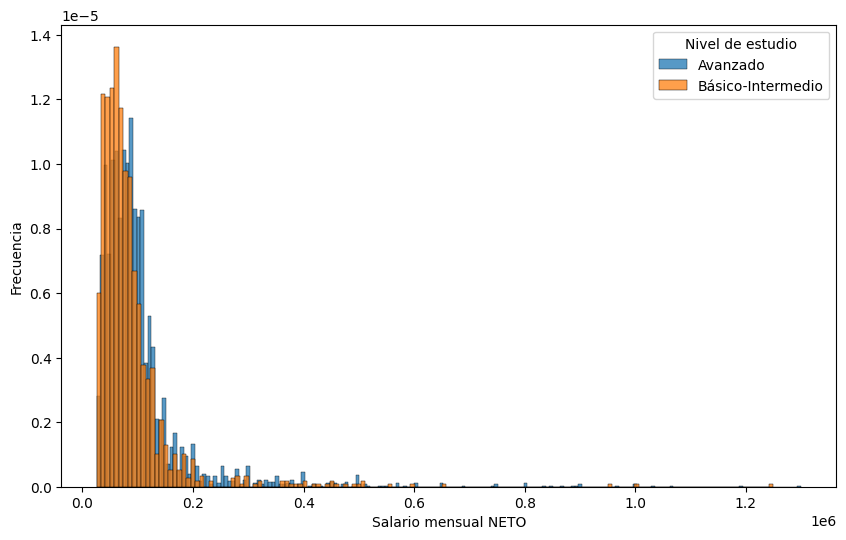

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

df_avanzado = df_sinatipicos[df_sinatipicos['profile_studies_level']=='Avanzado']
df_basint = df_sinatipicos[df_sinatipicos['profile_studies_level']=='Básico-Intermedio']

sns.histplot(df_avanzado['salary_monthly_NETO'], ax=ax, label='Avanzado', stat='density')
sns.histplot(df_basint['salary_monthly_NETO'], ax=ax, label='Básico-Intermedio', stat='density')

ax.set_xlabel('Salario mensual NETO')
ax.set_ylabel('Frecuencia')
ax.legend(title='Nivel de estudio')

plt.show()

In [ ]:
grouped_df = df_sinatipicos.groupby('profile_studies_level')
resultados = round(grouped_df['salary_monthly_NETO'].agg(['count','mean', 'median', 'std','max','min']),2)
resultados

,count,mean,median,std,max,min
profile_studies_level,,,,,,
Avanzado,4096,103813.09,84000.0,92800.59,1300000.0,25400.0
Básico-Intermedio,1438,86558.83,70000.0,77977.50,1250000.0,25400.0


A partir de estos resultados, se puede observar que el nivel de estudio parece estar relacionado con el salario neto, ya que el promedio y la mediana del salario neto aumentan a medida que aumenta el nivel de estudio. Además, la desviación estándar es menor para los niveles de estudio más bajos, lo que sugiere que hay menos variabilidad en el salario neto para aquellos con niveles de estudio más bajos. Sin embargo, es importante tener en cuenta que estos resultados no indican causalidad, sino solo una posible correlación entre las variables.

## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica.
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


Variable categórica = Género

Variable numérica 1= Sueldo neto

Variable numérica 2= Años de experiencia

In [ ]:
df.profile_gender.unique()

array(['Mujer', 'Hombre', 'Otros'], dtype=object)

In [ ]:
df.profile_gender.unique()

array(['Mujer', 'Hombre', 'Otros'], dtype=object)

(array([-200000.,       0.,  200000.,  400000.,  600000.,  800000.,
        1000000., 1200000., 1400000.]),
 [Text(-200000.0, 0, '−0.2'),
  Text(0.0, 0, '0.0'),
  Text(200000.0, 0, '0.2'),
  Text(400000.0, 0, '0.4'),
  Text(600000.0, 0, '0.6'),
  Text(800000.0, 0, '0.8'),
  Text(1000000.0, 0, '1.0'),
  Text(1200000.0, 0, '1.2'),
  Text(1400000.0, 0, '1.4')])

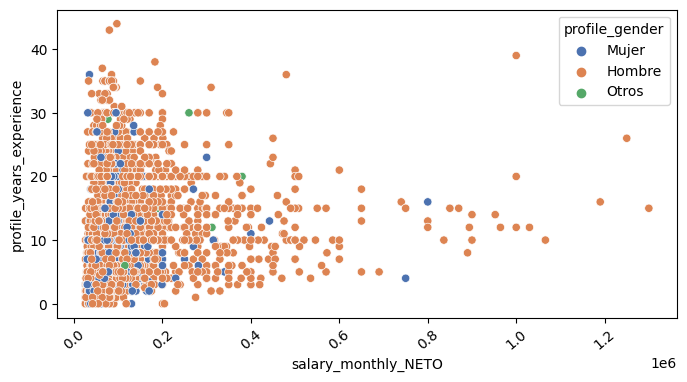

In [ ]:
fig = plt.figure(figsize=(8,4))
sns.scatterplot(x= df_sinatipicos['salary_monthly_NETO'], y=df_nuevo['profile_years_experience'],  hue=df.profile_gender, palette="deep") #se diferencias con color en countplot pero de a 2 variables x vez
plt.xticks(rotation=40)


El gráfico representa una dispersión  entre el salario mensual neto y los años de experiencia laboral de una muestra de personas encuestadas. Cada punto representa una persona encuestada, y se utiliza el color para distinguir las distintas categorías de género: Hombre, Mujer, y Otros.

En el eje horizontal (x) se muestra el salario mensual neto, mientras que en el eje vertical (y) se muestran los años de experiencia laboral. Podemos observar que hay una cierta tendencia positiva entre el salario mensual neto y los años de experiencia, lo que sugiere que a medida que aumenta la experiencia laboral, el salario tiende a ser mayor. Sin embargo, también se puede ver que hay una gran variabilidad en el salario mensual neto en cada nivel de experiencia.

Además, podemos notar que la mayoría de los puntos están agrupados en la parte inferior izquierda del gráfico, lo que sugiere que hay una gran cantidad de personas con bajos salarios y pocos años de experiencia. También se puede observar que hay más concentración de Hombres que de Mujeres.

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.]),
 [Text(-10.0, 0, '−10'),
  Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50')])

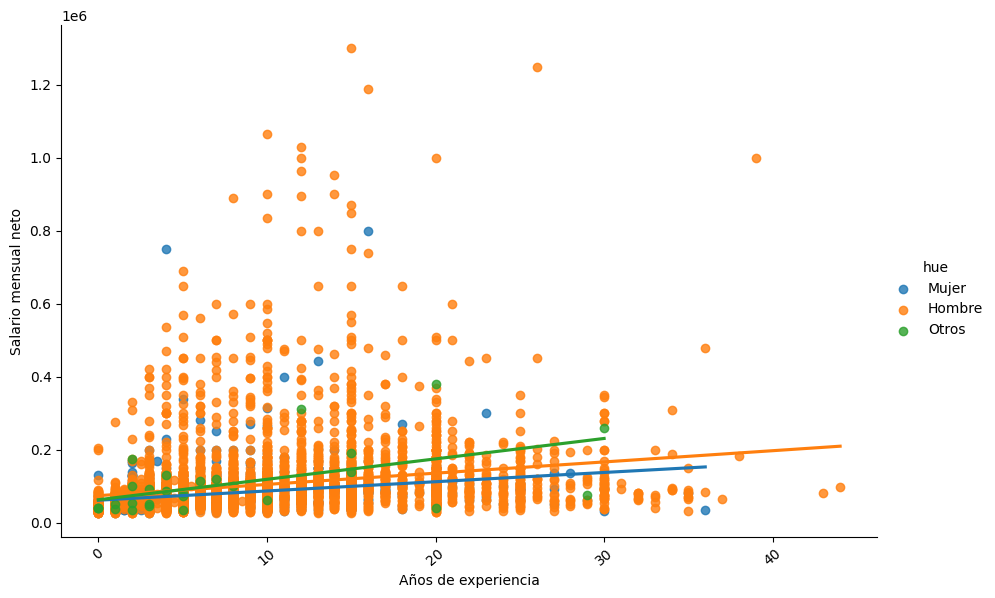

In [ ]:
# Este grafico nos brinda una visualización que refuerza la conclusión de que con los años de experiencia (cualquiera sea el genero) existe un tendencia a que el salario sea mayor
sns.lmplot(x='Años de experiencia', y='Salario mensual neto', data=pd.DataFrame({'Años de experiencia': df_nuevo['profile_years_experience'], 'Salario mensual neto': df_sinatipicos['salary_monthly_NETO'], 'hue': df.profile_gender}), hue='hue', ci=None, height=6, aspect=1.5)

plt.xticks(rotation=40)